# __DS 203 Assignment 5__

In [1]:
#importing the relevant libraries for visualization
import numpy as np                              #importing numpy
import pandas as pd                             #importing pandas
import matplotlib.pyplot as plt                 #importing matplotlib
import seaborn as sns                           #improting seaborn
import math                                     #importing math
import scipy.stats as stats                     #importing scipy.stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform, ttest_1samp, chi2
import scipy

In [2]:
#Reading the data into a pandas dataframe
house_df=pd.read_csv("C:\\Users\\dhruv\\Downloads\\NDAP_REPORT_7004.csv")
auto_df=pd.read_csv("C:\\Users\\dhruv\\Downloads\\Automobile_data.csv")
display(house_df.head())     #.head(n) is used to print only first n rows. By default, n=5
display(auto_df.head())

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


__Data Cleaning__

In [3]:
house_df=house_df.dropna()            #dropping the rows with null values
#changing the string 'zero' to flaot 0.
house_df["Number of census houses"]=house_df["Number of census houses"].replace("zero",float(0))
house_df["Houses having grass or thatch or bamboo etc. as material of wall"]=house_df["Houses having grass or thatch or bamboo etc. as material of wall"].replace("zero",float(0))
house_df["Houses having plastic or polythene as material of wall"]=house_df["Houses having plastic or polythene as material of wall"].replace("zero",float(0))
house_df.dtypes
#we also need to change the data types of these columns to float for which we use .astype(dtype)
house_df["Number of census houses"]=house_df["Number of census houses"].astype('float64')
house_df["Houses having grass or thatch or bamboo etc. as material of wall"]=house_df["Houses having grass or thatch or bamboo etc. as material of wall"].astype('float64')
house_df["Houses having plastic or polythene as material of wall"]=house_df["Houses having plastic or polythene as material of wall"].astype('float64')
house_df.dtypes  #printing the data types of the columns to check

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                           

In [4]:
new_df=house_df  #creating a copy of the original dataframe so that changes made are not reflected in the original dataframe
new_df=new_df.drop(new_df.columns[1:8],axis=1)   #dropping the unnecessary columns
new_df=new_df.drop(new_df.columns[5:12],axis=1)
new_df=new_df.drop(new_df.columns[2:4],axis=1)
pandas_series=new_df.iloc[:,2].div(new_df.iloc[:,1]).multiply(other=100)  #creating a new pandas series containing the precentage of mud/unburnt brick houses
new_df["Percentage Houses having mud or unburnt bricks as material of wall"]=pandas_series    #adding the series as a column in the dataframe
extra_df=new_df
display(new_df)

,Rowid,Number of census houses,Houses having mud or unburnt brick as material of wall,Percentage Houses having mud or unburnt bricks as material of wall
0,1,109465.00000,22710.000000,20.746357
1,2,33522.00000,6807.000000,20.306068
2,3,85561.57321,7174.278724,8.384931
3,4,13136.00000,935.000000,7.117844
4,5,120312.42680,19207.721280,15.964869
...,...,...,...,...
1468,1469,42352.00000,426.000000,1.005856
1469,1470,5410.00000,50.000000,0.924214
1470,1471,5279.00000,6.000000,0.113658
1471,1472,35408.00000,4939.000000,13.948825


In [5]:
#checking of the column has some invalid values or not
my_arr=new_df.iloc[:,3].to_numpy()   #creating an array of a column of the dataframe
print(my_arr)
new_arr=np.sort(my_arr)       #Sorting the values of the array
check_arr=np.isnan(new_arr)   #Checking for 'not a number' entries
print(check_arr)
count=0                       #to count the number of nan values
for num in range(len(my_arr)):
    if(check_arr[num]==True):
        count=count+1
print(count)

[20.74635728 20.30606766  8.38493082 ...  0.11365789 13.94882512
  4.42703492]
[False False False ...  True  True  True]
30


In [6]:
new_df=new_df.sort_values(by="Percentage Houses having mud or unburnt bricks as material of wall",ascending=True)  #sorting the values
new_df=new_df.dropna()   #dropping the rows having missing values
new_df=new_df.reset_index()     #to reset the index because otherwise the indexes would also be arranged by values of the precentage column
new_df=new_df.drop(new_df.columns[0:2],axis=1)
display(new_df)

,Number of census houses,Houses having mud or unburnt brick as material of wall,Percentage Houses having mud or unburnt bricks as material of wall
0,120.0000,0.0000,0.000000
1,9959.0000,3.0000,0.030124
2,3156.0000,2.0000,0.063371
3,6305.0000,4.0000,0.063442
4,19039.0000,15.0000,0.078786
...,...,...,...
1433,107424.0000,100704.0000,93.744415
1434,175008.0000,167506.0000,95.713339
1435,161287.7004,155579.4393,96.460821
1436,159973.3595,154311.6153,96.460821


In [7]:
new_df.isnull().sum()  #finding the number of null values in each column of the dataframe

Number of census houses                                               0
Houses having mud or unburnt brick as material of wall                0
Percentage Houses having mud or unburnt bricks as material of wall    0
dtype: int64

Thus, there are no more null values in any column of the dataframe

__Analysis__

In [8]:
display(new_df)
arr=new_df.iloc[:,2].to_numpy()           #creating an array of the column "percentage houses having mud/unburnt brick as material of wall"
def arr_mean(array):                      #defining a function to find the mean of the elements of an array
    arr_sum=array.sum()
    average=arr_sum/len(array)
    return average
def arr_std_dev(array,mean):              #defining a function to find the standard deviation of the elements of the array
    square_sum=0
    for i in range(len(array)):
        square_sum=square_sum+(array[i]-mean)**2      #this is basically sigma[(xi-mean)^2]/number of values
    variance=square_sum/len(array)
    #standard deviation is the square root of the variance
    std_dev=math.sqrt(variance)
    return std_dev
a=np.copy(arr)        #creating a copy of the original data so that any changes made are not reflected in the original array
b=np.copy(arr)
#using z score (I have added the reference link in the references section)
mean=arr_mean(arr)
dev=arr_std_dev(arr,mean)
for num in range(len(arr)):
    a[num]=(arr[num]-mean)/dev  #array a has z normalized values from data

,Number of census houses,Houses having mud or unburnt brick as material of wall,Percentage Houses having mud or unburnt bricks as material of wall
0,120.0000,0.0000,0.000000
1,9959.0000,3.0000,0.030124
2,3156.0000,2.0000,0.063371
3,6305.0000,4.0000,0.063442
4,19039.0000,15.0000,0.078786
...,...,...,...
1433,107424.0000,100704.0000,93.744415
1434,175008.0000,167506.0000,95.713339
1435,161287.7004,155579.4393,96.460821
1436,159973.3595,154311.6153,96.460821


__Q-Q Plots__

[0.00000000e+00 3.01235064e-02 6.33713561e-02 ... 9.64608206e+01
 9.64608206e+01 9.64608206e+01]


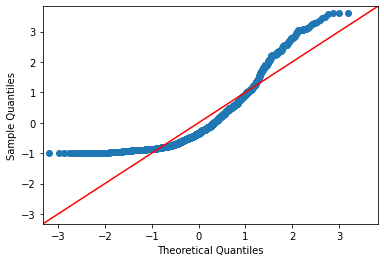

In [9]:
#Q-Q plot with percentile of data(unchanged) on the y axis compared with percentiles from normal distribution
print(b)   #copy of the actual array without any change(normalization)
qqplot(b,norm,fit=True,line="45")
plt.show()

There is some deviation but it is close to the straight line

[-0.99825399 -0.99681872 -0.99523459 ...  3.59773207  3.59773207
  3.59773207]


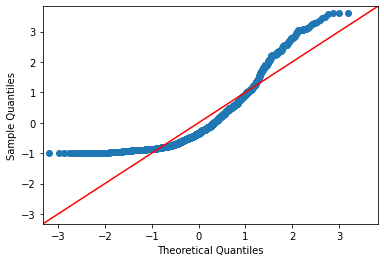

In [10]:
#Q-Q plot of z normalized data on the y axis compared with percentiles from normal distribution 
print(a)
qqplot(a,norm,fit=True,line="45")
plt.show()  #to show the plot

There is some deviation but the graph is very similar to the one with un-normalized data

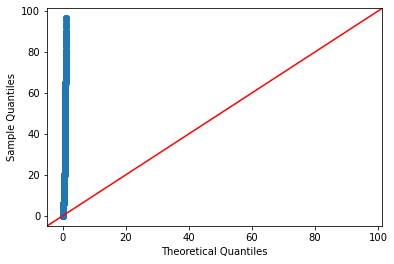

In [11]:
#Q-Q plot with percentiles of un-normalized data on the y-axis compared with percentiles from uniform distribution
qqplot(b,uniform,fit=True,line="45")
plt.show()

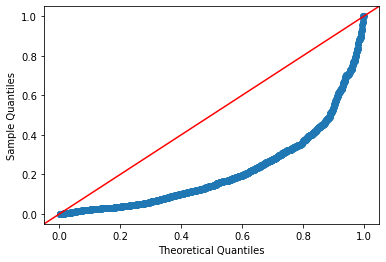

In [12]:
#Q-Q plot with percentiles of z-normalized data on the y axis compared with percentiles from uniform distribution
qqplot(a,uniform,fit=True,line="45")
plt.show()

From these graphs, we can conclude that sample quantiles deviate significantly from the theoretical quantiles in uniform distribution and thus, our data is better repesented/explained by Gaussian distribution than Uniform distribution

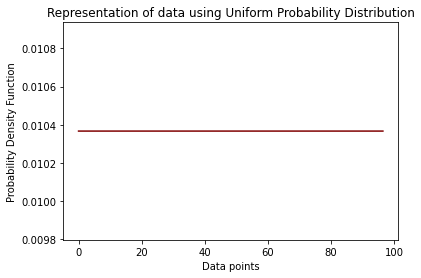

In [13]:
#We have to find MLE parameter estimate for Uniform Distribution (1/(b-a))
def Uniform_pdf(a):      #defining a function to get the Uniform probability density function for an array 'a'
    maximum=np.max(a)    #to find the maximum value in the array
    minimum=np.min(a)    #to find the minimum values in the array
    zero_arr=np.zeros(len(arr))
    for num in range(len(arr)):
        zero_arr[num]=1/(maximum-minimum)    #this is basically 1/(b-a) x belongs to [a,b] (Uniform distribution)
    return zero_arr
pdfunc=Uniform_pdf(arr)      #Probability density function
plt.plot(arr,pdfunc , color = 'maroon')
plt.title("Representation of data using Uniform Probability Distribution")
plt.xlabel('Data points')
plt.ylabel('Probability Density Function')
plt.show()

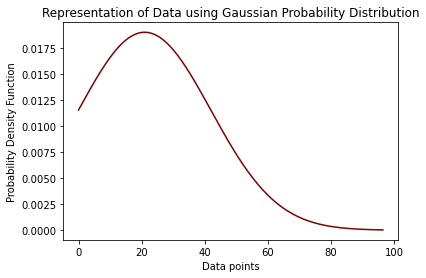

In [14]:
#We have to find MLE parameter estimate for Gaussian Distribution
def Gauss_pdf(a,mean,std_dev):   #function to get the Gaussian probability density function
    k=math.sqrt(2*(np.pi)*(std_dev**2))**(-1)   #basically this is 1/sqrt(2*pi*sigma^2)
    probability_density=k*np.exp(-0.5*((a-mean)/std_dev)**2)
    return probability_density
avg=arr_mean(arr)    #mean of the array arr (this is basically the column - Percentage of houses with mud/unburnt bricks 
std_dev=arr_std_dev(arr,mean)  #standard deviation of the same column
pdfunc=Gauss_pdf(arr,avg,std_dev)  #probability density d=function
plt.plot(arr,pdfunc,color = 'maroon')
plt.xlabel('Data points')
plt.title("Representation of Data using Gaussian Probability Distribution")
plt.ylabel('Probability Density Function')
plt.show()

__Question 2__

In this Question, we have been given the a new type of distribution called Inverted Quadratic and we have to write a python function to generate Q-Q plot of the given sample using the Inverted Quadratic function.

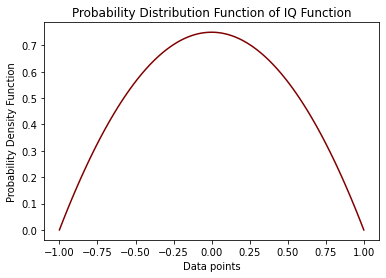

In [15]:
my_arr=np.linspace(-1,1,100)   #to obtain an array containing 100 equally spaced numbers between -1 and 1
#Inverted Quadratic function -> p(x)=0.75(1-x^2) for |x|<=1 and p(x)=0 for |x|>1
IQ=0.75*(1-my_arr**2)
plt.plot(my_arr, IQ,color='maroon')
plt.title("Probability Distribution Function of IQ Function")
plt.xlabel('Data points')
plt.ylabel('Probability Density Function')
plt.show()

0.9998979694949494


<function matplotlib.pyplot.show(close=None, block=None)>

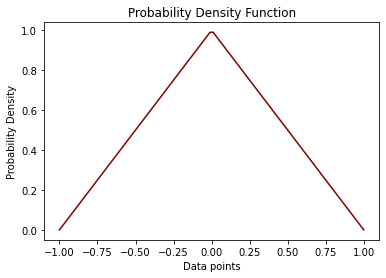

In [16]:
x=np.linspace(-1,1,100) #Array containing 100 equally sapced numbers from -1 to 1 
y=np.linspace(-1,1,100) #Array containing 100 equally spaced numbers from -1 to 1 for storing the probability density function values for x
cdf=np.zeros(100)   #Array initialized to 0 in order to store the CDF values(Cumulative Distribution Function)
area=0     #Variable to store area of small rectangle
for num in range(0,100):
    if(x[num]>0 and x[num]<1):  #Tent function  1-x for x=(0,1) and 1+x for x=(-1,0) and 1 for x=0 and 0 elsewhere.
        y[num]=1-x[num]
    elif(x[num]>-1 and x[num]<0):
        y[num]=1+x[num]
    elif(x[num]==0):
        y[num]=1
    else:        #The function is 0 elsewhere
        y[num]=0
    area=area+y[num]*(0.0202020202)   #0.020202020.. is the wif=dth of each small rectangle. Thus elementaruy area for integration = height*0.02020202.. 
    cdf[num]=area
print(area)
#Plotting the probability density function
plt.plot(x,y,color="maroon")
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("Probability Density Function")
plt.show        

Text(0.5, 1.0, 'Cumulative Distribution Function')

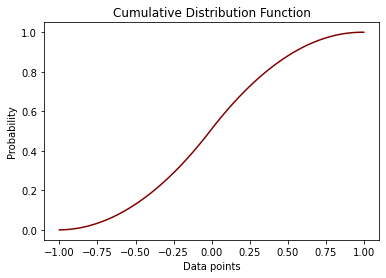

In [17]:
#PLotting the Cumulative Distribution function
plt.plot(x,cdf,color="maroon")
plt.xlabel('Data points')
plt.ylabel('Probability')
plt.title("Cumulative Distribution Function")

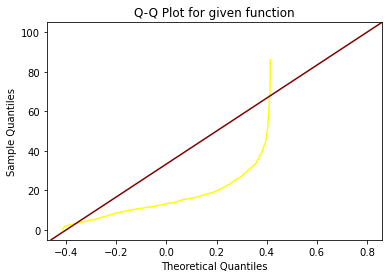

In [18]:
#Function to calculate inverse of cdf, to find percentile of theoretical samples from the given distribution
# Percentile is inverse of cdf
def inverse_cdf(cdf):
    inverse_cdf_arr=np.zeros(len(cdf))
    for num in range(len(cdf)):
        if(cdf[num]>0.5):
            inverse_cdf_arr[num]=(-1+ math.sqrt(2*(cdf[num])))
        else:
            inverse_cdf_arr[num]=(1-math.sqrt(2-2*(cdf[num])))
    return inverse_cdf_arr
array=inverse_cdf(cdf)
e=np.zeros(100) # Array with 100 elements all zero, to store percentiles in it
for i in range(0,100):
    e[i]=(np.percentile(arr,i))
plt.plot(array,e,color="yellow")
plt.ylabel('Sample Quantiles')
plt.title("Q-Q Plot for given function")
plt.xlabel('Theoretical Quantiles')
plt.axline([-0.4, 0], [0.8, 100], color='maroon')   #to get a staright line if the distribution was satisfied/explained by the dataset

In [20]:
#creating a new dataframe as the ol one has been altered considerably
my_df=house_df
ch = 'J' #variable which will be used indexing new columns
for i in range(9,19):
    my_df['NewCol '+str(ch)]=my_df.iloc[:,i]/my_df['Number of census houses']*100 #adding new columns based on given conditions in question
    ch = chr(ord(ch) + 1) #incrementing the ch variable
df=my_df.drop(my_df.columns[0:7], axis=1) #Dropping uneccessary columns
df=df.drop(df.columns[1:14],axis=1)
df=df.drop(df.columns[2:11],axis=1)
#Renaming the columns
df.rename(columns = {'NewCol L':'% of Houses having mud or unburnt brick as material of wall'}, inplace = True)
df=df.dropna() #Dropping data points with 'NaN' Values
house_rural = (df[df['Type of residence namely rural or urban']=='Rural']) #Columns containing only rural values
house_urban = df[df['Type of residence namely rural or urban']=='Urban']# Columns Containing only urban values
#Keeping only numerical columns
house_rural=house_rural.drop(house_rural.columns[0:1],axis=1)
house_urban=house_urban.drop(house_urban.columns[0:1],axis=1)
#Dataframe consisting Of Rural And Urban Values separately
cdtR=df[df['Type of residence namely rural or urban']=='Rural']
cdtU=df[df['Type of residence namely rural or urban']=='Urban']
Rural=cdtR['% of Houses having mud or unburnt brick as material of wall']
Urban=cdtU['% of Houses having mud or unburnt brick as material of wall']

__In Question 3a__, we have to determine whether the percentage of houses with 'mud or unburnt bricks' is actually larger in rural areas as compared to urban areas. So, here I am using One Tailed Two sampled T-test. __One Tailed Two sampled T-test -> A one-tailed test is a statistical test in which the critical area of a distribution is one-sided so that it is either greater than or less than a certain value, but not both. If the sample being tested falls into the one-sided critical area, the alternative hypothesis will be accepted instead of the null hypothesis__

1. Null Hyphothesis-> There is no difference in the percentage of mud/unburnt brick houses in rural vs urban areas
2. Actual Hypothesis-> There is a difference in the percentage of mud/unburnt brick houses in rural v urban areas

In [21]:
_,p_value=stats.ttest_ind(a=Rural,b=Urban,equal_var=False,alternative='greater')  #Two sampled T test.
print(p_value)
if(p_value>0.5):
    print("The Null Hyphothesis is wrong and there is a difference in the percentage of mud/unburnt brick houses in rural and urban areas")
else:
    print("The Null Hyphothesis is correct and there is no difference in the percentage of mud/unburnt brick houses in rural and urban areas")

6.986818169097021e-45
The Null Hyphothesis is correct and there is no difference in the percentage of mud/unburnt brick houses in rural and urban areas


__In Question 3b__, we have to determine if either rural or urban precentage of houses with "mud or unburnt brick" for the same district can be predicted using the other in the housing data. For this, I hve used Pearson Correlation.

This is because if the correlation is found to be higher, then the variables are highly dependent on each other.
If Pearson correlation is positive and close to 1, then increase in one variable causes increase in the other and if the Pearson correlation is negative and close to -1, then increase in one variable causes a decrease in the other variable.

In [22]:
mylist = list(zip(Rural,Urban))         #using a zip function to combine both rural and urban values and making a new dataframe from it
rur_urb = pd.DataFrame(mylist, columns=['Rural','Urban'])
rur_urb.corr('pearson')

,Rural,Urban
Rural,1.000000,0.341851
Urban,0.341851,1.000000


thus, we can see that the correlation is small and positive and thus, we cannot predict either rural or urban precentage of houses with "mud or unburnt brick" for the same district using the other

References -
1. Stack Overflow
2. Pandas documentation
3. https://www.youtube.com/watch?v=4Fta6KQ1QHQ&t=248s
4. https://www.youtube.com/watch?v=ttmKa1DovfI
5. https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
6. https://stats.stackexchange.com/questions/427749/qq-plot-comparison-of-z-normalized-datasets

Thank You